In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

df = pd.read_csv('/home/ec2-user/SageMaker/BdeB_ml_project/data/heart_failure_clinical_records_dataset.csv')
dfN = df.drop(['DEATH_EVENT'],axis=1)
dfN.head(1).values
sc = StandardScaler()
pca = PCA(n_components=0.95,whiten=True)

In [22]:
X_n = sc.fit_transform(dfN.values)
X_pca = pca.fit_transform(X_n)

X_pca.shape

(299, 11)

In [12]:
sc

StandardScaler()

In [13]:
pca

PCA(n_components=0.95, whiten=True)

In [14]:
from joblib import dump, load


dump(sc, "/home/ec2-user/SageMaker/BdeB_ml_project/deployment/ml_config_files/standard_scaler_fit")
dump(pca, "/home/ec2-user/SageMaker/BdeB_ml_project/deployment/ml_config_files/pca_fit")

['/home/ec2-user/SageMaker/BdeB_ml_project/deployment/ml_config_files/pca_fit']

In [16]:
from joblib import dump, load
scfit = load("/home/ec2-user/SageMaker/BdeB_ml_project/deployment/ml_config_files/standard_scaler_fit")
pcafit = load("/home/ec2-user/SageMaker/BdeB_ml_project/deployment/ml_config_files/pca_fit")

x1_n = scfit.transform(dfN.head(1).values)
x1_pca = pcafit.transform(x1_n)
x1_pca

array([[ 0.67898088,  1.81699697,  0.91597867,  1.39699057, -0.25657792,
        -0.98567044, -0.99958896,  0.60403279, -1.06470692, -0.33240422,
         0.15121128]])

In [20]:
import boto3

s3cli = boto3.client('s3')
s3cli.upload_file("/home/ec2-user/SageMaker/BdeB_ml_project/deployment/ml_config_files/standard_scaler_fit","bucket","mlproject/configs/standard_scaler_fit")
s3cli.upload_file("/home/ec2-user/SageMaker/BdeB_ml_project/deployment/ml_config_files/pca_fit","bucket","mlproject/configs/pca_fit")

In [1]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 0.23.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages
Requires: threadpoolctl, joblib, numpy, scipy
Required-by: 


In [10]:
!pip3 install -U scikit-learn

     |████████████████████████████████| 6.8 MB 10.4 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [59]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2,covariance_type='full', random_state=44)
gmm.fit(X_pca)
print(gmm.converged_)

True


In [60]:
res = gmm.predict_proba([[ 1.44005506, -1.26474776 , 0.61504467,  3.78061853 , 4.16593304 ,-2.87678962,3.04057358 ,-0.6301601,   0.11990565 ,-1.97993717 ,-1.97684124]])
print(res.round(3))

[[1. 0.]]


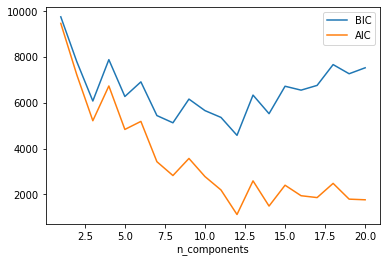

In [38]:
import numpy as np
import matplotlib.pyplot as plt 

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_pca)
          for n in n_components]

plt.plot(n_components, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');